In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("E:/movie dataset codsoft/iris/IRIS.csv")

In [3]:
data.shape

(150, 5)

In [4]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

In [6]:
import matplotlib.pyplot as plt

<Axes: >

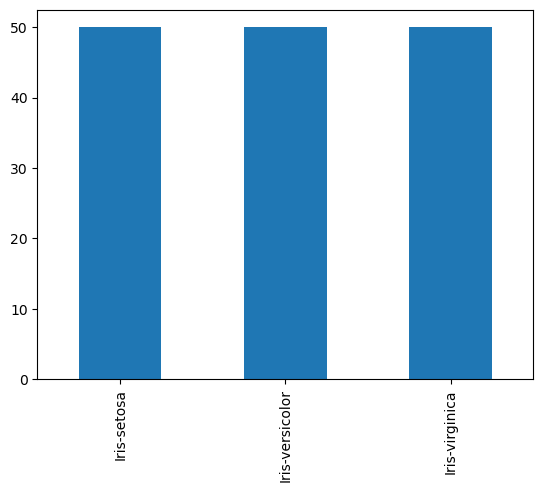

In [7]:
data['species'].value_counts().plot(kind='bar')

In [8]:
import seaborn as sns

# To know distribution of three species based on sepal_length

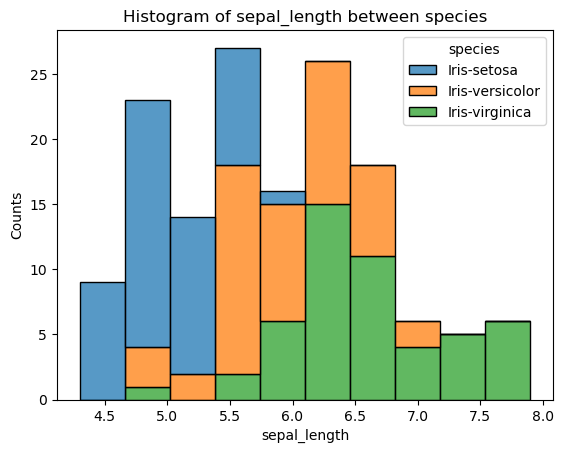

In [9]:
sns.histplot(data=data, x='sepal_length', hue='species', bins=10, multiple='stack')
plt.xlabel("sepal_length")
plt.ylabel("Counts")
plt.title("Histogram of sepal_length between species")
plt.show()

# To know distribution of three species based on sepal_width

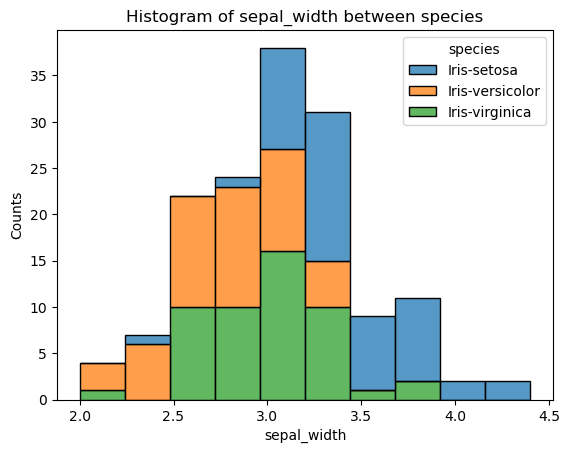

In [10]:
sns.histplot(data=data, x='sepal_width', hue='species', bins=10, multiple='stack')
plt.xlabel("sepal_width")
plt.ylabel("Counts")
plt.title("Histogram of sepal_width between species")
plt.show()

# To know distribution of three species based on petal_length

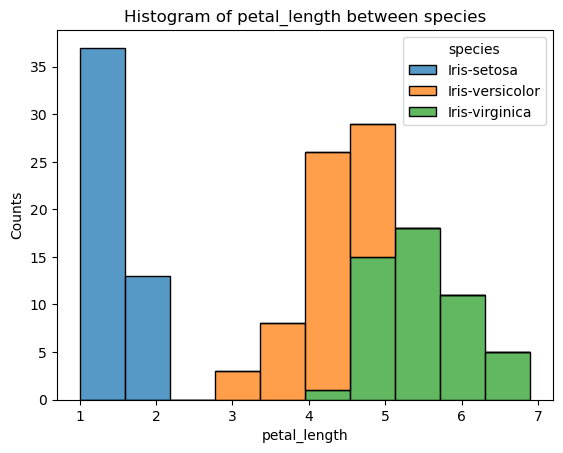

In [11]:
sns.histplot(data=data, x='petal_length', hue='species', bins=10, multiple='stack')
plt.xlabel("petal_length")
plt.ylabel("Counts")
plt.title("Histogram of petal_length between species")
plt.show()

# To know distribution of three species based on petal_length

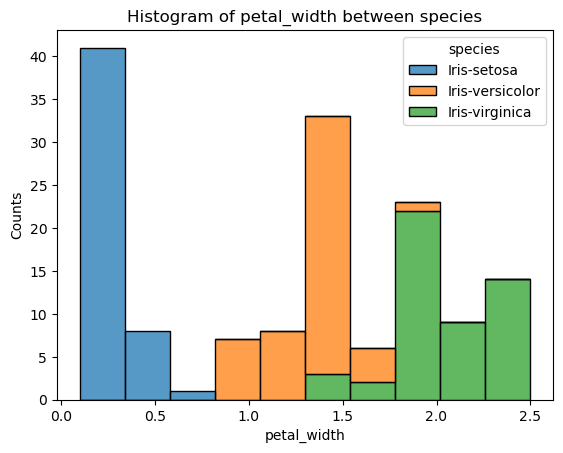

In [12]:
sns.histplot(data=data, x='petal_width', hue='species', bins=10, multiple='stack')
plt.xlabel("petal_width")
plt.ylabel("Counts")
plt.title("Histogram of petal_width between species")
plt.show()

C:\Users\ANUP\AppData\Local\Temp\ipykernel_15504\2935274314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_corr.corr()


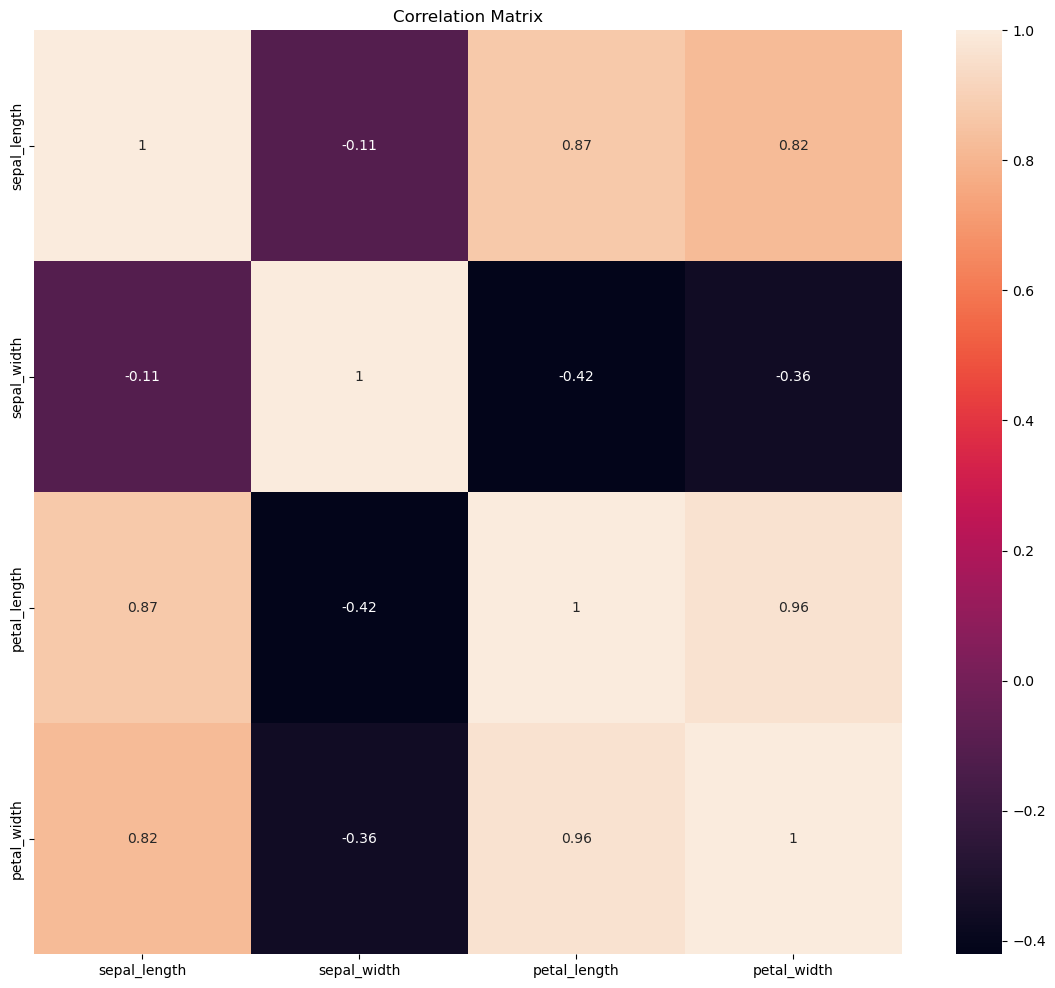

In [13]:
iris_corr = data.iloc[:,:]
corr = iris_corr.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Feature Encoder for species

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
labl = OneHotEncoder(sparse = False)
labl.fit_transform(data[['species']].values)
pd.get_dummies(data['species'].values)

C:\Users\ANUP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [16]:
data['species'] = data['species'].apply(lambda x: 0 if x == 'Iris-setosa' else (1 if x == 'Iris-versicolor' else 2))

In [17]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)

# feature scalling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
standerscal = StandardScaler()
x_train = standerscal.fit_transform(x_train)
x_test = standerscal.transform(x_test)

# Evaluate Model

In [23]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
def get_model(model):
    modl = model()
    modl.fit(x_train, y_train)
    print("mean squared error = {} ".format(mean_squared_error(y_test, modl.predict(x_test))))
    print("accuracy score = {} ".format(accuracy_score(y_test, modl.predict(x_test))))
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, modl.predict(x_test)))
    cm_display.plot()
    plt.show()

# 1st model : RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

mean squared error = 0.0 
accuracy score = 1.0 


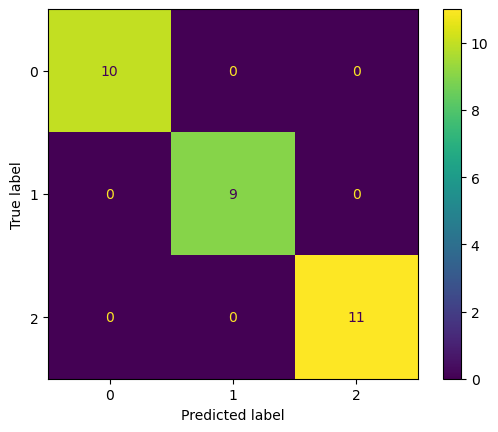

In [26]:
RFC = get_model(RandomForestClassifier)

# 2nd model : KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

mean squared error = 0.0 
accuracy score = 1.0 


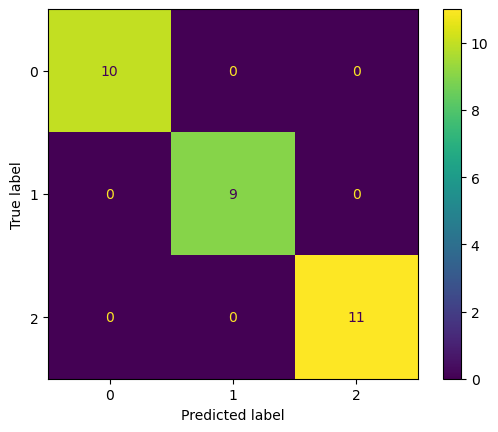

In [28]:
KNN = get_model(KNeighborsClassifier)

# 3rd model : SVC

In [29]:
from sklearn.svm import SVC

mean squared error = 0.0 
accuracy score = 1.0 


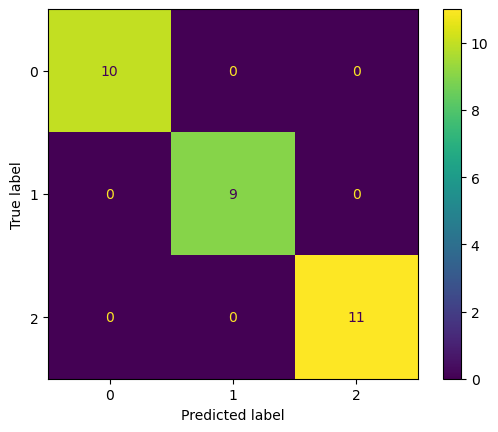

In [30]:
SVC = get_model(SVC)

# 4th model : GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB

mean squared error = 0.0 
accuracy score = 1.0 


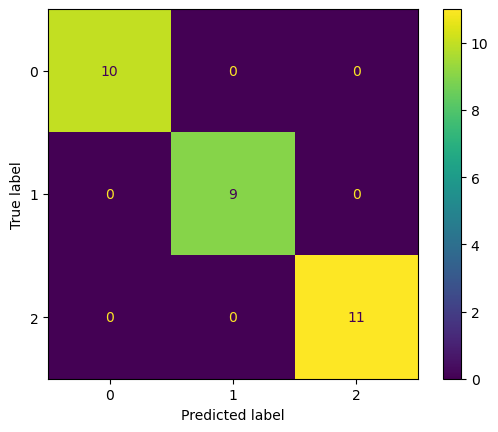

In [32]:
GNB = get_model(GaussianNB)

# 5th model : Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

mean squared error = 0.0 
accuracy score = 1.0 


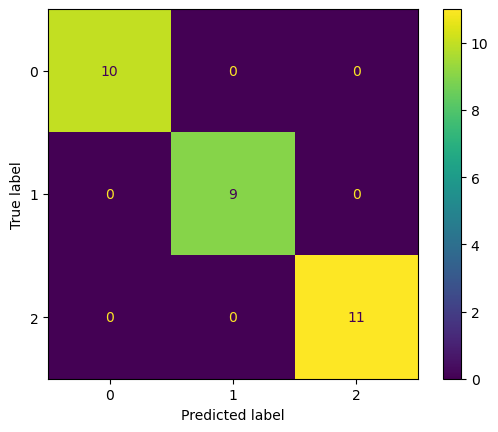

In [34]:
DT = get_model(DecisionTreeClassifier)

In [36]:
data.to_csv('updated_data.csv', index= False)

In [38]:
#path to save the file
data.to_csv("E:/movie dataset codsoft/iris/updated_data.csv", index=False)
